##Analysis of a dataset on mortality in Macedonia

###Description of the data set

The data is taken from the World Health Organization (WHO) and focuses on the death rate in the Republic of Macedonia for the period of 2018-2021.
The data set we will consider has a size of 912 x 10.
The categories by which the data are distributed are by age group, year, gender and cause of death.

###**Data preparation**

In [5]:
# Get the data
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/datasets/WHOMortalityDatabase_Deaths_sex_age_a_country_area_year_All_Causes_NorthMacedonia.csv")

In [6]:
df.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Causes,Number
0,EU,Europe,MKD,North Macedonia,2021,All,Age00,[0],All,85
1,EU,Europe,MKD,North Macedonia,2021,All,Age01_04,[1-4],All,14
2,EU,Europe,MKD,North Macedonia,2021,All,Age05_09,[5-9],All,12
3,EU,Europe,MKD,North Macedonia,2021,All,Age10_14,[10-14],All,12
4,EU,Europe,MKD,North Macedonia,2021,All,Age15_19,[15-19],All,32


In [186]:
df

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroupCode,AgeGroup,Causes,Number
0,EU,Europe,MKD,North Macedonia,2021,All,Age00,[0],All,85
1,EU,Europe,MKD,North Macedonia,2021,All,Age01_04,[1-4],All,14
2,EU,Europe,MKD,North Macedonia,2021,All,Age05_09,[5-9],All,12
3,EU,Europe,MKD,North Macedonia,2021,All,Age10_14,[10-14],All,12
4,EU,Europe,MKD,North Macedonia,2021,All,Age15_19,[15-19],All,32
...,...,...,...,...,...,...,...,...,...,...
922,EU,Europe,MKD,North Macedonia,2018,Female,Age65_69,[65-69],Injuries,12
923,EU,Europe,MKD,North Macedonia,2018,Female,Age70_74,[70-74],Injuries,6
924,EU,Europe,MKD,North Macedonia,2018,Female,Age75_79,[75-79],Injuries,12
925,EU,Europe,MKD,North Macedonia,2018,Female,Age80_84,[80-84],Injuries,14


To make it easier for us to work, we will do some minor settings to the data

In [7]:
#replace empty spaces to get the CamelCase naming convention of dataset's columns
df.columns = df.columns.str.replace(' ', '')
df.rename(columns={"Agegroupcode": "AgeGroupCode"}, inplace=True)

In [8]:
# drop useless rows
df.drop(df[df['AgeGroupCode'] == 'Age_unknown'].index, inplace = True)

In [ ]:
# Check for missing values
import re
import nltk
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [ ]:
missing_values = df.isnull().sum()
percentage = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

This means our dataset does not have problems with missing values

###**Exploratory Data Analysis**

In [9]:
df.shape

(912, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 926
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RegionCode    912 non-null    object
 1   RegionName    912 non-null    object
 2   CountryCode   912 non-null    object
 3   CountryName   912 non-null    object
 4   Year          912 non-null    int64 
 5   Sex           912 non-null    object
 6   AgeGroupCode  912 non-null    object
 7   AgeGroup      912 non-null    object
 8   Causes        912 non-null    object
 9   Number        912 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 78.4+ KB


In [11]:
df.Number.describe()

count     912.000000
mean      385.166667
std       812.449750
min         0.000000
25%         7.000000
50%        26.000000
75%       243.750000
max      5177.000000
Name: Number, dtype: float64

In [13]:
# some other continiuos variable descriptors
df['Number'].median()

26.0

In [ ]:
# Check if any duplicate records
df.duplicated().sum()

In [ ]:
#Find null values

df.isnull().sum()

In [ ]:
df.dtypes

###**Dataset visual analysis**

<Axes: >

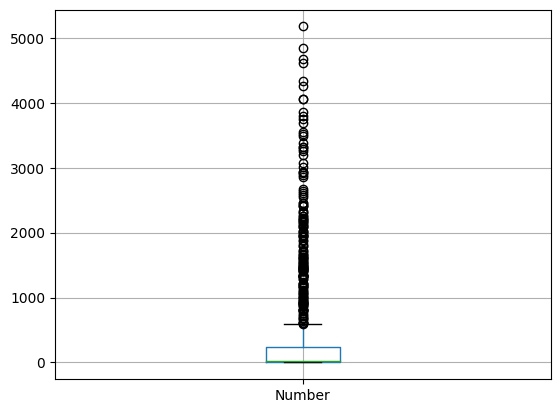

In [54]:
df[['Number']].boxplot()

<ipython-input-55-6f16cd63a51e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  line_up=sns.distplot(df['Year'], bins=3, kde=True, rug=True)


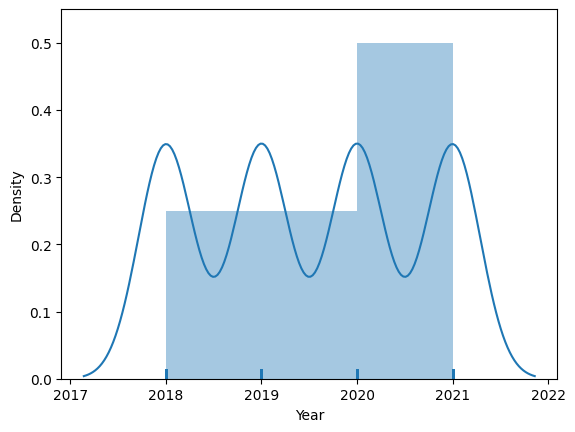

In [55]:
# Distribution plot of variable 'Year'
import seaborn as sns
line_up=sns.distplot(df['Year'], bins=3, kde=True, rug=True)

In [46]:
xTmp = []
for i in df.Year.unique():
  xTmp.append(i)

yTmp = []
for i in range(0,df.Year.nunique()):
  dfTmp = df[(df['Sex'] == 'All') & (df['Causes'] == 'All') & (df['Year'] == xTmp[i])]
  yTmp.append(sum(dfTmp['Number']))
  print("Total number of death in "+ str(xTmp[i]) + " is " + str(sum(dfTmp['Number'])))

Total number of death in 2021 is 28516
Total number of death in 2020 is 25754
Total number of death in 2019 is 20446
Total number of death in 2018 is 19727


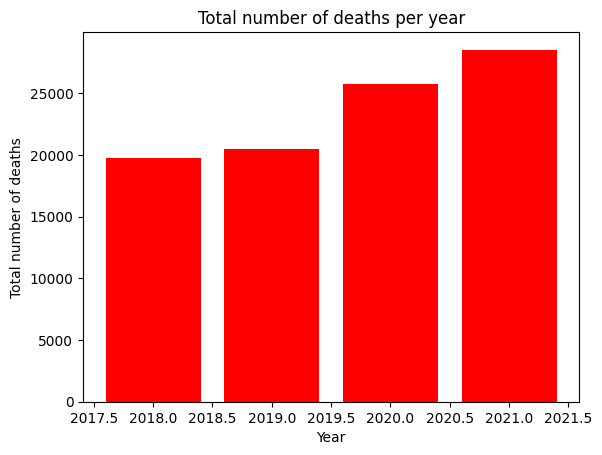

<Axes: title={'center': 'scatter chart'}, xlabel='Year', ylabel='Number'>

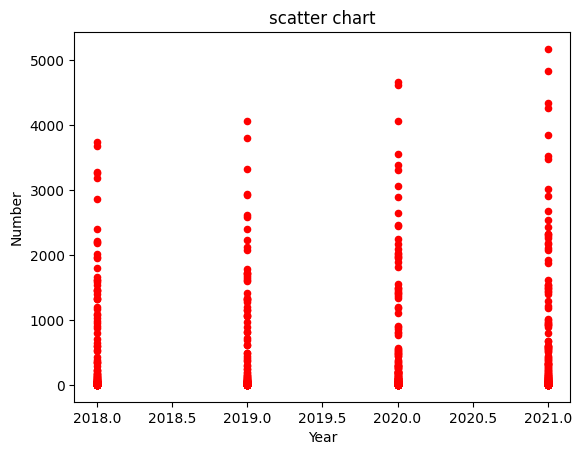

In [50]:
import matplotlib.pyplot as plt
 
x=xTmp
 
# giving the values against
# each value at x axis
y=yTmp
plt.bar(x, y,color='red')
 
# setting x-label
plt.xlabel("Year")
 
# setting y_label
plt.ylabel("Total number of deaths")  
plt.title("Total number of deaths per year")
plt.show()

df.plot(x='Year', y='Number', kind="scatter", color='red')
plt.title("scatter chart")
plt.subplot(1, 1, 1)

As we can conclude from the above chart, every consequent year, an increasing number of deaths is reported.

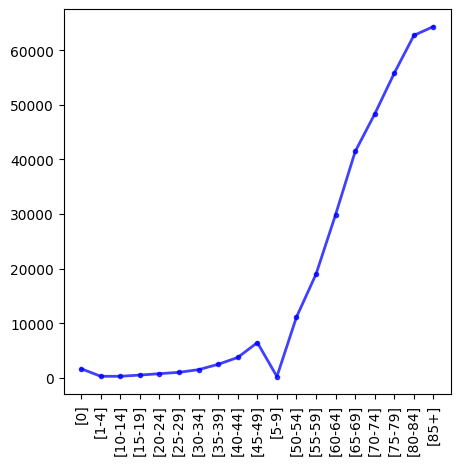

In [58]:
plt.figure(figsize=[5,5])
plt.plot(df.groupby('AgeGroup').Number.sum(),  '-ob', linewidth='2', alpha = 0.75, markersize=3)
plt.xticks(rotation=90)
plt.show()

In [142]:
dfTmp = df[(df['Sex'] == 'All') & (df['Causes'] == 'Injuries')]
TotalNumOfDeaths_Injuries = sum(dfTmp['Number'])


dfTmp = df[(df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions')]
TotalNumOfDeaths_Injuries_Communicable = sum(dfTmp['Number'])


dfTmp = df[(df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases')]
TotalNumOfDeaths_Injuries_Noncommunicable = sum(dfTmp['Number'])

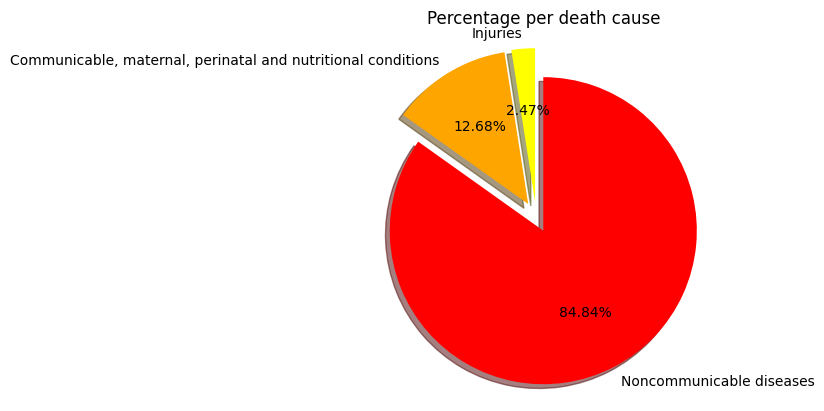

In [144]:
labels= ['Injuries', 'Communicable, maternal, perinatal and nutritional conditions', 'Noncommunicable diseases']

colors=['yellow', 'orange', 'red']

sizes= [TotalNumOfDeaths_Injuries, TotalNumOfDeaths_Injuries_Communicable, TotalNumOfDeaths_Injuries_Noncommunicable]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1,), autopct='%1.2f%%')

plt.title('Percentage per death cause')

plt.axis('equal')

plt.show()

In [146]:
xTmp = []
for i in df.Sex.unique():
    xTmp.append(i)

xTmp.remove('All')

yearTmp = []
for i in df.Year.unique():
  yearTmp.append(i)

yLabels = {}

yTmp = []
for m in range(0,len(yearTmp)):
  yLabels[str(m)+"Tmp"] = []
  for i in range(0,len(xTmp)):
    dfTmp = df[(df['Sex'] == xTmp[i]) & (df['Year'] == yearTmp[m])]
    yLabels[str(m)+"Tmp"].append(sum(dfTmp['Number']))
    print("Total number of death in "+ str(yearTmp[m]) + " per Sex '"+ str(xTmp[i]) +"' is " + str(sum(dfTmp['Number'])))

Total number of death in 2021 per Sex 'Male' is 28869
Total number of death in 2021 per Sex 'Female' is 25444
Total number of death in 2020 per Sex 'Male' is 25437
Total number of death in 2020 per Sex 'Female' is 21565
Total number of death in 2019 per Sex 'Male' is 19080
Total number of death in 2019 per Sex 'Female' is 17596
Total number of death in 2018 per Sex 'Male' is 19707
Total number of death in 2018 per Sex 'Female' is 17938


<ipython-input-148-04282bd68cbf>:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color='blue')
<ipython-input-148-04282bd68cbf>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color='blue')
<ipython-input-148-04282bd68cbf>:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color='orange')
<ipython-input-148-04282bd68cbf>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedenc

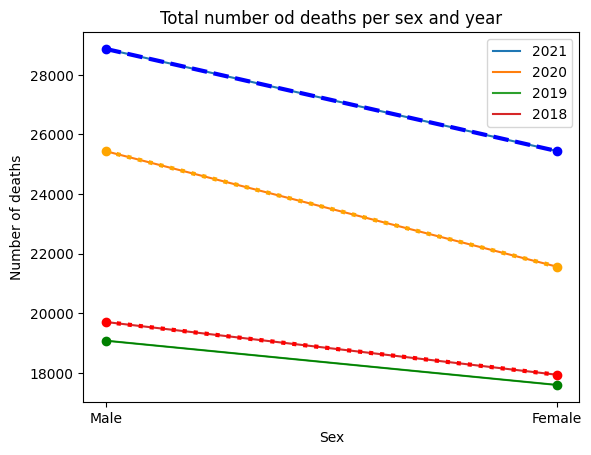

In [148]:
# Creation of Data
x1 = xTmp
y1 = yLabels.get("0Tmp")
y2 = yLabels.get("1Tmp")
y3 = yLabels.get("2Tmp")
y4 = yLabels.get("3Tmp")
  
# Plotting the Data
plt.plot(x1, y1, label='2021')
plt.plot(x1, y2, label='2020')
plt.plot(x1, y3, label='2019')
plt.plot(x1, y4, label='2018')
  
plt.xlabel('Sex')
plt.ylabel('Number of deaths')
plt.title("Total number od deaths per sex and year")
  
plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color='blue')
plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color='orange')
plt.plot(y3, 'o:g', linestyle='solid', linewidth='1',color='green')
plt.plot(y4, 'o:g', linestyle='dotted', linewidth='3',color='red')
  
plt.legend()

In [95]:
xTmp = []
for i in df.Causes.unique():
    xTmp.append(i)

xTmp.remove('All')

yearTmp = []
for i in df.Year.unique():
  yearTmp.append(i)

yLabels = {}

yTmp = []
for m in range(0,len(yearTmp)):
  yLabels[str(m)+"Tmp"] = []
  for i in range(0,len(xTmp)):
    dfTmp = df[(df['Sex'] == 'All') & (df['Causes'] == xTmp[i]) & (df['Year'] == yearTmp[m])]
    yLabels[str(m)+"Tmp"].append(sum(dfTmp['Number']))
    print("Total number of death in "+ str(yearTmp[m]) + " per Cause '"+ str(xTmp[i]) +"' is " + str(sum(dfTmp['Number'])))

Total number of death in 2021 per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 6404
Total number of death in 2021 per Cause 'Injuries' is 661
Total number of death in 2021 per Cause 'Noncommunicable diseases' is 18732
Total number of death in 2020 per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 3424
Total number of death in 2020 per Cause 'Injuries' is 429
Total number of death in 2020 per Cause 'Noncommunicable diseases' is 17395
Total number of death in 2019 per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 236
Total number of death in 2019 per Cause 'Injuries' is 448
Total number of death in 2019 per Cause 'Noncommunicable diseases' is 15546
Total number of death in 2018 per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 235
Total number of death in 2018 per Cause 'Injuries' is 468
Total number of death in 2018 per Cause 'Noncommunicable diseases' is 17215


<ipython-input-100-d8e0caee338f>:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-100-d8e0caee338f>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-100-d8e0caee338f>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'orange')
<ipython-input-100-d8e0caee338f>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take pre

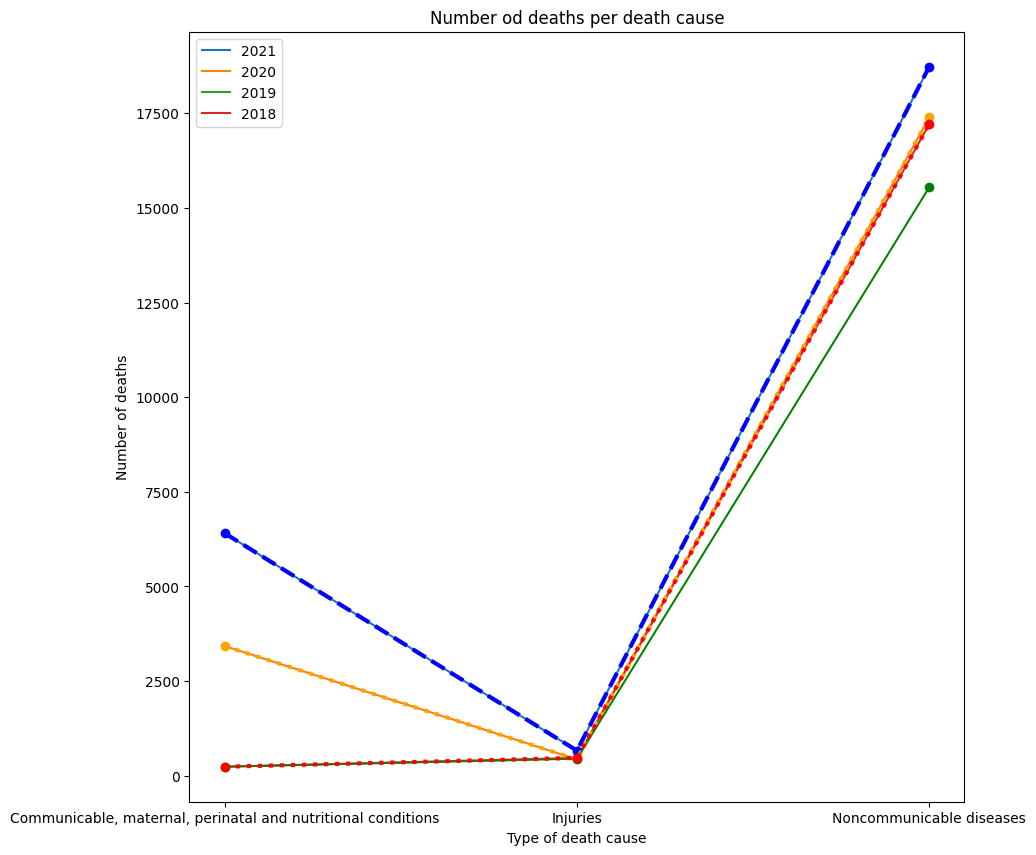

In [100]:
plt.figure(figsize=[10,10])     
# Creation of Data
x1 = xTmp
y1 = yLabels.get("0Tmp")
y2 = yLabels.get("1Tmp")
y3 = yLabels.get("2Tmp")
y4 = yLabels.get("3Tmp")
  
# Plotting the Data
plt.plot(x1, y1, label='2021')
plt.plot(x1, y2, label='2020')
plt.plot(x1, y3, label='2019')
plt.plot(x1, y4, label='2018')
  
plt.xlabel('Type of death cause')
plt.ylabel('Number of deaths')
plt.title("Number od deaths per death cause")
  
plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'orange')
plt.plot(y3, 'o:g', linestyle='solid', linewidth='1',color='green')
plt.plot(y4, 'o:g', linestyle='dotted', linewidth='3',color='red')
  
plt.legend()

In [137]:
xTmp = []
for i in df.Causes.unique():
    xTmp.append(i)

xTmp.remove('All')

yTmp = []
for i in df.Sex.unique():
    yTmp.append(i)

yTmp.remove('All')

yLabels = {}

for m in range(0,len(yTmp)):
  yLabels[str(m)+"Tmp"] = []
  for i in range(0,len(xTmp)):
    dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == yTmp[m]) & (df['Causes'] == xTmp[i])]
    yLabels[str(m)+"Tmp"].append(sum(dfTmp['Number']))
    print("Total number of death in  2021 of "+ str(yTmp[m]) + " people per Cause '"+ str(xTmp[i]) +"' is " + str(sum(dfTmp['Number'])))

Total number of death in  2021 of Male people per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 3671
Total number of death in  2021 of Male people per Cause 'Injuries' is 407
Total number of death in  2021 of Male people per Cause 'Noncommunicable diseases' is 9636
Total number of death in  2021 of Female people per Cause 'Communicable, maternal, perinatal and nutritional conditions' is 2733
Total number of death in  2021 of Female people per Cause 'Injuries' is 254
Total number of death in  2021 of Female people per Cause 'Noncommunicable diseases' is 9096


<ipython-input-139-766c0500f4be>:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-139-766c0500f4be>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-139-766c0500f4be>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'red')
<ipython-input-139-766c0500f4be>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take preced

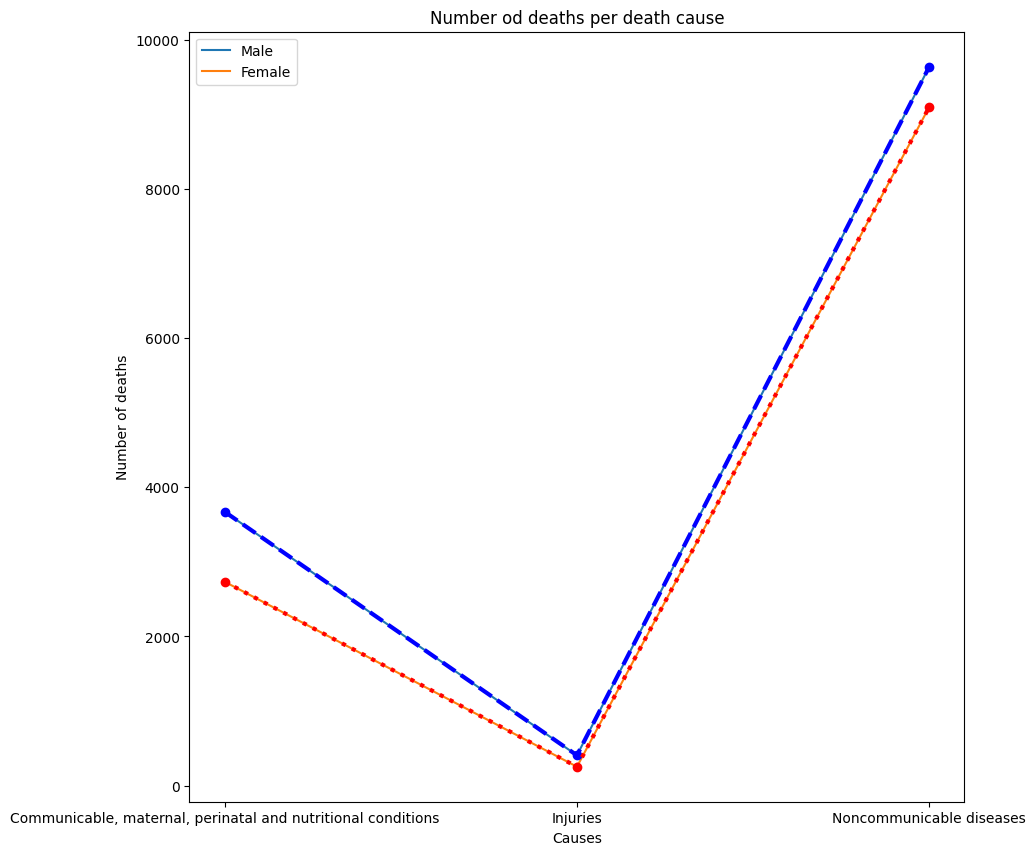

In [139]:
plt.figure(figsize=[10,10])     
# Creation of Data
x1 = xTmp
y1 = yLabels.get("0Tmp")
y2 = yLabels.get("1Tmp")

  
# Plotting the Data
plt.plot(x1, y1, label='Male')
plt.plot(x1, y2, label='Female')
  
plt.xlabel('Causes')
plt.ylabel('Number of deaths')
plt.title("Number od deaths per death cause")
  
plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'red')
  
plt.legend()

*Age group categories:*
* 0-14
* 15-24
* 24-54
* 55-74
* 75+

In [184]:
dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Injuries') & ((df['AgeGroupCode'] == 'Age00') | (df['AgeGroupCode'] == 'Age01_04') | (df['AgeGroupCode'] == 'Age05_09') | (df['AgeGroupCode'] == 'Age10_14'))]
numOfDeaths2021Age0_14Injuries = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Injuries') & ((df['AgeGroupCode'] == 'Age15_19') | (df['AgeGroupCode'] == 'Age20_24') )]
numOfDeaths2021Age15_24Injuries = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Injuries') & ((df['AgeGroupCode'] == 'Age25_29') | (df['AgeGroupCode'] == 'Age30_34') | (df['AgeGroupCode'] == 'Age35_39') | (df['AgeGroupCode'] == 'Age40_44') | (df['AgeGroupCode'] == 'Age45_49') | (df['AgeGroupCode'] == 'Age50_54'))]
numOfDeaths2021Age25_54Injuries = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Injuries') & ((df['AgeGroupCode'] == 'Age55_59') | (df['AgeGroupCode'] == 'Age60_64') | (df['AgeGroupCode'] == 'Age65_69') | (df['AgeGroupCode'] == 'Age70_74'))]
numOfDeaths2021Age55_74Injuries = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Injuries') & ((df['AgeGroupCode'] == 'Age75_79') | (df['AgeGroupCode'] == 'Age80_84') | (df['AgeGroupCode'] == 'Age85_over'))]
numOfDeaths2021Age75plusInjuries = sum(dfTmp['Number'])



dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions') & ((df['AgeGroupCode'] == 'Age00') | (df['AgeGroupCode'] == 'Age01_04') | (df['AgeGroupCode'] == 'Age05_09') | (df['AgeGroupCode'] == 'Age10_14'))]
numOfDeaths2021Age0_14Communicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions') & ((df['AgeGroupCode'] == 'Age15_19') | (df['AgeGroupCode'] == 'Age20_24') )]
numOfDeaths2021Age15_24Communicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions') & ((df['AgeGroupCode'] == 'Age25_29') | (df['AgeGroupCode'] == 'Age30_34') | (df['AgeGroupCode'] == 'Age35_39') | (df['AgeGroupCode'] == 'Age40_44') | (df['AgeGroupCode'] == 'Age45_49') | (df['AgeGroupCode'] == 'Age50_54'))]
numOfDeaths2021Age25_54Communicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions') & ((df['AgeGroupCode'] == 'Age55_59') | (df['AgeGroupCode'] == 'Age60_64') | (df['AgeGroupCode'] == 'Age65_69') | (df['AgeGroupCode'] == 'Age70_74'))]
numOfDeaths2021Age55_74Communicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Communicable, maternal, perinatal and nutritional conditions') & ((df['AgeGroupCode'] == 'Age75_79') | (df['AgeGroupCode'] == 'Age80_84') | (df['AgeGroupCode'] == 'Age85_over'))]
numOfDeaths2021Age75plusCommunicable = sum(dfTmp['Number'])



dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases') & ((df['AgeGroupCode'] == 'Age00') | (df['AgeGroupCode'] == 'Age01_04') | (df['AgeGroupCode'] == 'Age05_09') | (df['AgeGroupCode'] == 'Age10_14'))]
numOfDeaths2021Age0_14Noncommunicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases') & ((df['AgeGroupCode'] == 'Age15_19') | (df['AgeGroupCode'] == 'Age20_24') )]
numOfDeaths2021Age15_24Noncommunicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases') & ((df['AgeGroupCode'] == 'Age25_29') | (df['AgeGroupCode'] == 'Age30_34') | (df['AgeGroupCode'] == 'Age35_39') | (df['AgeGroupCode'] == 'Age40_44') | (df['AgeGroupCode'] == 'Age45_49') | (df['AgeGroupCode'] == 'Age50_54'))]
numOfDeaths2021Age25_54Noncommunicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases') & ((df['AgeGroupCode'] == 'Age55_59') | (df['AgeGroupCode'] == 'Age60_64') | (df['AgeGroupCode'] == 'Age65_69') | (df['AgeGroupCode'] == 'Age70_74'))]
numOfDeaths2021Age55_74Noncommunicable = sum(dfTmp['Number'])

dfTmp = df[(df['Year'] == 2021) & (df['Sex'] == 'All') & (df['Causes'] == 'Noncommunicable diseases') & ((df['AgeGroupCode'] == 'Age75_79') | (df['AgeGroupCode'] == 'Age80_84') | (df['AgeGroupCode'] == 'Age85_over'))]
numOfDeaths2021Age75plusNoncommunicable = sum(dfTmp['Number'])




<ipython-input-185-b7ed39ee5b08>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-185-b7ed39ee5b08>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
<ipython-input-185-b7ed39ee5b08>:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'orange')
<ipython-input-185-b7ed39ee5b08>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take pre

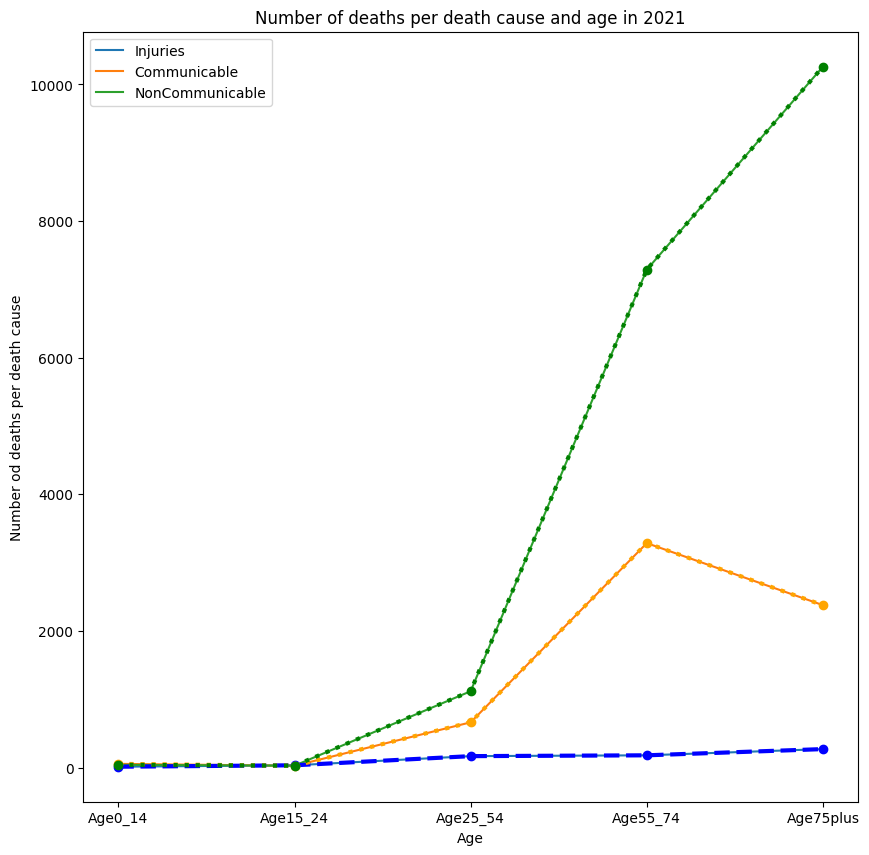

In [185]:
# import the library
import matplotlib.pyplot as plt
  
plt.figure(figsize=[10,10])     
# Creation of Data
x1 = ['Age0_14', 'Age15_24','Age25_54','Age55_74','Age75plus']
y1 = [numOfDeaths2021Age0_14Injuries, numOfDeaths2021Age15_24Injuries,numOfDeaths2021Age25_54Injuries,numOfDeaths2021Age55_74Injuries,numOfDeaths2021Age75plusInjuries]
y2 = [numOfDeaths2021Age0_14Communicable, numOfDeaths2021Age15_24Communicable,numOfDeaths2021Age25_54Communicable,numOfDeaths2021Age55_74Communicable,numOfDeaths2021Age75plusCommunicable]
y3 = [numOfDeaths2021Age0_14Noncommunicable, numOfDeaths2021Age15_24Noncommunicable,numOfDeaths2021Age25_54Noncommunicable,numOfDeaths2021Age55_74Noncommunicable,numOfDeaths2021Age75plusNoncommunicable]
  
# Plotting the Data
plt.plot(x1, y1, label='Injuries')
plt.plot(x1, y2, label='Communicable')
plt.plot(x1, y3, label='NonCommunicable')
  
plt.xlabel('Age')
plt.ylabel('Number od deaths per death cause')
plt.title("Number of deaths per death cause and age in 2021")
  
plt.plot(y1, 'o:g', linestyle='--', linewidth='3',color = 'blue')
plt.plot(y2, 'o:g', linestyle=':', linewidth='3',color = 'orange')
plt.plot(y3, 'o:g', linestyle=':', linewidth='3',color = 'green')
  
plt.legend()